In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sande\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [3]:
import os 

print("Current Working Directory:", os.listdir(path))

Current Working Directory: ['deliveries.csv', 'matches.csv']


In [4]:
data=[]

for i in os.listdir(path):
    data.append(i)

In [5]:
data[0]

'deliveries.csv'

In [6]:
df1=pd.read_csv(os.path.join(path,data[0]))
df2=pd.read_csv(os.path.join(path,data[1]))

In [7]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
df2.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


### Univariate-Analysis

Countplot

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [10]:
print(df1.columns.tolist())


['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


<Axes: xlabel='inning', ylabel='count'>

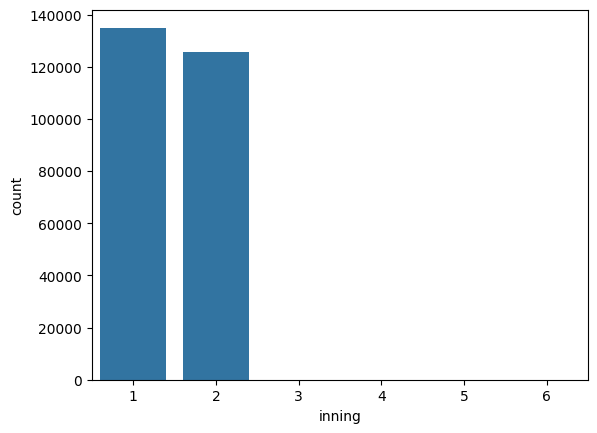

In [11]:
sns.countplot(data=df1,x='inning')


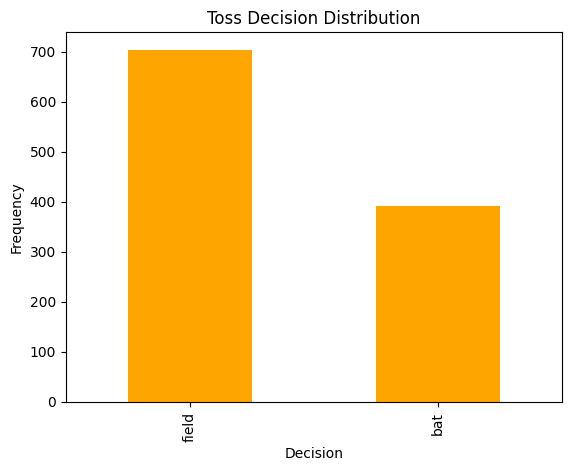

In [12]:
# Example: Toss Decision Distribution
df2['toss_decision'].value_counts().plot(kind='bar',color='orange')
plt.title('Toss Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.show()

In [13]:
# | 🏷️ Column Name    | 🧠 What It Means                                                                                          |
# | ------------------ | --------------------------------------------------------------------------------------------------------- |
# | `match_id`         | Unique ID for each match. Multiple rows (balls) will have the same match_id.                             |
# | `inning`           | Indicates 1st or 2nd innings (sometimes 3rd or 4th in double innings formats).                            |
# | `batting_team`     | The team batting during that delivery.                                                                    |
# | `bowling_team`     | The team bowling during that delivery.                                                                    |
# | `over`             | Over number in the innings (0 to 19 for T20).                                                             |
# | `ball`             | Ball number within the over (1 to 6, sometimes more due to extras).                                       |
# | `batter`           | The batsman who faced that specific ball.                                                                 |
# | `bowler`           | The bowler who delivered that ball.                                                                       |
# | `non_striker`      | The non-striker at the other end.                                                                         |
# | `batsman_runs`     | Runs scored by the batter on this ball (0 to 6, or even more in rare cases). Does **not** include extras. |
# | `extra_runs`       | Runs not attributed to the batsman — like wides, no-balls, leg byes, etc.                                 |
# | `total_runs`       | `batsman_runs + extra_runs` — total runs scored on that delivery.                                         |
# | `extras_type`      | Type of extra (e.g., `'wide'`, `'noball'`, `'legbyes'`, `'byes'`). NaN if no extra.                       |
# | `is_wicket`        | 1 if a wicket fell on this ball, else 0.                                                                  |
# | `player_dismissed` | Name of the player who got out (if any).                                                                  |
# | `dismissal_kind`   | Type of dismissal (e.g., `'bowled'`, `'caught'`, `'run out'`, `'lbw'`, etc.).                             |
# | `fielder`          | Name of the fielder involved in the dismissal (if applicable — like catches, run-outs).                   |
